<a href="https://colab.research.google.com/github/zhaojin-2001/MMO/blob/main/zhaojin_PK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ИУ5И-25М Сюэ Чжунь

Рубежный контроль №1: "Методы обработки данных"

Номер варианта: 18

Номер задачи №1: 18

Номер задачи №2: 38



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# 加载 Wine Quality 数据集
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# 检查数据集的基本信息
print(f"Data set shape: {data.shape}")
print(f"Feature List: {data.columns.tolist()}")


Data set shape: (1599, 12)
Feature List: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


# Задача №18.

Для набора данных проведите масштабирование данных для одного (произвольного) числового признака на основе Z-оценки.

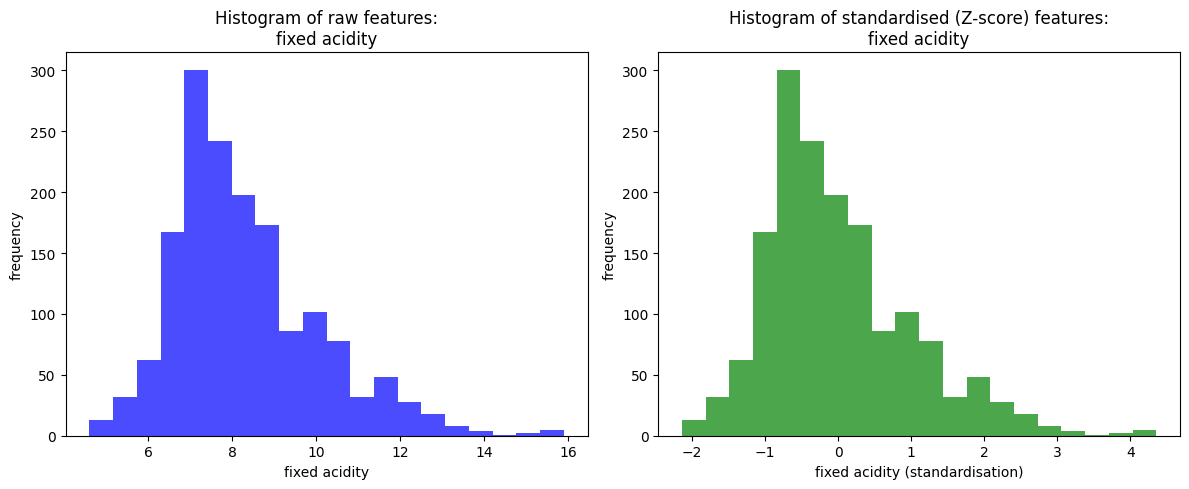

In [ ]:
# ------------------- 1. 基于 Z 分数的数据标准化 -------------------
# 选择一个任意的数值特征（例如第一个列）
feature_to_scale = data.columns[0]

# 使用 Z 分数进行标准化
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(data[[feature_to_scale]])

# 可视化原始特征和标准化后的特征分布
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data[feature_to_scale], bins=20, color='blue', alpha=0.7)
plt.title(f'Histogram of raw features:\n{feature_to_scale}')
plt.xlabel(feature_to_scale)
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.hist(scaled_feature, bins=20, color='green', alpha=0.7)
plt.title(f'Histogram of standardised (Z-score) features:\n{feature_to_scale}')
plt.xlabel(f'{feature_to_scale} (standardisation)')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

# Задача №38.

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectKBest для 10 лучших признаков, и метод, основанный на взаимной информации.

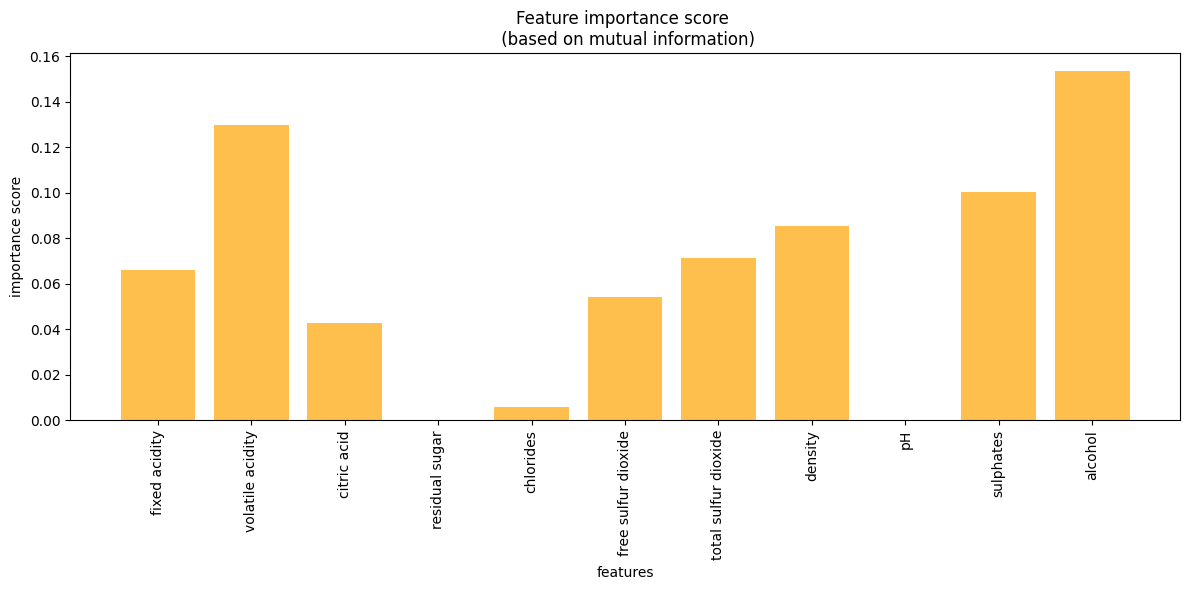

Best features selected: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [ ]:
# ------------------- 2. 使用 SelectKBest 进行特征选择 -------------------
# 使用互信息法选择最好的 10 个特征
selector = SelectKBest(score_func=mutual_info_regression, k=10)
X_new = selector.fit_transform(data.drop(columns=['quality']), data['quality'])

# 获取被选中的特征名称
selected_features = data.drop(columns=['quality']).columns[selector.get_support()]

# 可视化特征重要性得分
scores = selector.scores_
plt.figure(figsize=(12, 6))
plt.bar(range(len(scores)), scores, color='orange', alpha=0.7)
plt.xticks(range(len(scores)), data.drop(columns=['quality']).columns, rotation=90)
plt.title('Feature importance score \n (based on mutual information)')
plt.xlabel('features')
plt.ylabel('importance score')
plt.tight_layout()
plt.show()

print(f"Best features selected: {list(selected_features)}")


# для произвольной колонки данных построить гистограмму.

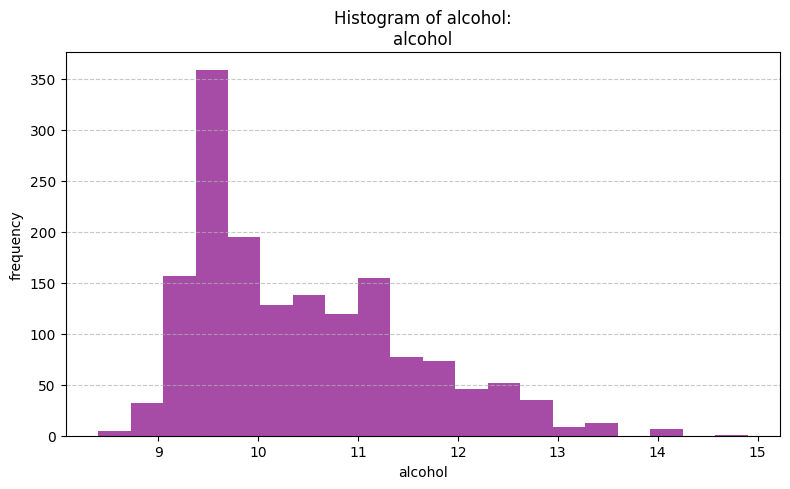

In [ ]:
# ------------------- 3. 随机选择一列并绘制直方图 -------------------
# 随机选择数据集中的某一列（例如 'alcohol' 列）
random_column = 'alcohol'

plt.figure(figsize=(8, 5))
plt.hist(data[random_column], bins=20, color='purple', alpha=0.7)
plt.title(f'Histogram of alcohol:\n{random_column}')
plt.xlabel(random_column)
plt.ylabel('frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()